 <img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

In [1]:
NAME = "Robina Shaheen"
DATE = "05052020"
COLLABORATORS = ""

# Santa Ana, Climate Change and Wildfires 
## Part I Weather and Atmospheric Composition of San Diego during May 2014 wildfires. 
High temperature, low relative humidity in the air are frequent tell tale signs of the Santa Ana winds. 
These air masses originates in the Great Basin and Mojave desert and passes through Santa Ana canyons and hence named **Santa Ana Winds**. The goal of this work is to understand the link between Santa Ana, vegetation and wildfires using three sources of data.
1. EPA air quality data.
* Environmental Protection Agency, USA. <a href="https://www.epa.gov/outdoor-air-quality-data//" target="_blank">EPA website/ User Guide to download data</a>.

2. Landsat Satellite data.
* USGS Earth Explorer Website, USA. <a href="https://earthexplorer.usgs.gov//" target="_blank">USGS website/ User Guide to download data</a>.

3. Calfire Wildfire, USA. <a href="https://www-calfirecloud.msappproxy.net///" target="_blank">CalFire website/ User Guide to download data</a>.

## Workflow
1. Import packages and modules 
2. Import datetime conversion tools beteween panda and matplotlib for time series analysis
3. Download air quality data from the EPA website
4. Set working directory to "earth-analytics" 
5. Define paths to download data files from data folder 'sd_fires_2014'
6. Import data into dataframes using appropriate functions(date-parser, indexing, remove missing values)
    * weather data  Jan-Dec. 2014
    * Atmospheric gases and particulate matter data Jan - Dec. 2014
7. view nature and type of data 
8. Resample data for daily values during 2014 fire season (Mar-June 2014)
9. Plot data to view any anomalies in data .
10. discuss plots and conclusions.

## Resources

To complete this part of the assignment following chapter/websites were reviewed. 
* Time series data <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python//" target="_blank">Time Series Data in Python</a> online textbook, which covers writing Date, time functions in Python. 
* General python commands <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science//" target="_blank">Intro to Earth Data Science online textbook</a> 
* Earthpy functions <a href="https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html#colorado-flood//" target="_blank">EarthPy User Guide</a>.
* Adherence to PEP 8 standards <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python//" target="_blank">online textbook page on PEP 8 </a>.

In [ ]:
# Core imports needed for grading
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

## Import Packages

In the cells below packages/modules were imported needed to:
* create plots 
* set  working directory
* download data
* work with pandaframes

In [2]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

## Set Working Directory
1. Use conditional statement to set working directory
2. Set base path to download data
3. Define path to download data
4. Import data and save as dataframes.

In [3]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")
    
# Set base path to download data 
base_path = os.path.join(ea_path, "data","SD_2014_aq_data")
base_path

working directory is set to earth-analytics


'C:\\Users\\bina_\\earth-analytics\\data\\SD_2014_aq_data'

In [4]:
# Files to download for further analysis
# Define relative path to files
file_path1 = os.path.join("data","SD_2014_aq_data",                         
                         "daily_PM10_total_2014.csv")
file_path2 = os.path.join("data", "SD_2014_aq_data",
                         "daily_PM2_AQI_2014.csv")
file_path3 = os.path.join("data", "SD_2014_aq_data",
                         "daily_O3_2014.csv")
file_path4 = os.path.join("data", "SD_2014_aq_data",
                         "daily_NO2_2014.csv")
file_path5 = os.path.join("data", "SD_2014_aq_data",
                         "daily_CO_2014.csv")
file_path6 = os.path.join("data", "SD_2014_aq_data",
                         "daily_RH_DP_2014.csv")
file_path7 = os.path.join("data", "SD_2014_aq_data",
                         "daily_TEMP_2014.csv")
file_path8= os.path.join("data", "SD_2014_aq_data",
                         "daily_VOCS_2014.csv")
file_path9 = os.path.join("data", "SD_2014_aq_data",
                         "daily_LEAD_2014.csv")
file_path10 = os.path.join("data", "SD_2014_aq_data",
                         "daily_PM25_2014.csv")
file_path11 = os.path.join("data", "SD_2014_aq_data",
                         "daily_PM2_AQI_2014.csv")
file_path12 = os.path.join("data", "SD_2014_aq_data",
                         "daily_PRESS_2014.csv")
file_path13 = os.path.join("data", "SD_2014_aq_data",
                         "daily_WIND_2014.csv")

# To check if path is created
os.path.exists(file_path1)

True

In [5]:
# Import csv files into dataframe and ensure date time is imported properly.
ca_PM10_2014_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_PM2_2014_df = pd.read_csv(file_path2, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_O3_2014_df = pd.read_csv(file_path3, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_NO2_2014_df = pd.read_csv(file_path4, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_CO_2014_df = pd.read_csv(file_path5, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_RH_2014_df = pd.read_csv(file_path6, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_temp_2014_df = pd.read_csv(file_path7, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_vocs_2014_df = pd.read_csv(file_path8, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_lead_2014_df = pd.read_csv(file_path9, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_pm25_2014_df = pd.read_csv(file_path10, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_pm2_AQI_2014_df = pd.read_csv(file_path11, parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_pres_2014_df = pd.read_csv(file_path12,parse_dates= ['Date Local'],
                                index_col=['Date Local'])
ca_wind_2014_df = pd.read_csv(file_path13,parse_dates=['Date Local'],
                                index_col=['Date Local'])

# View/test data to ensure correct files are loaded.
ca_pm25_2014_df.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
Date Local,,,,,,,,,,,,,,,,,,,,,
2014-01-02,1,73,23,88502,1,33.553056,-86.815,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,...,23.0,707.0,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",7/31/2015
2014-01-05,1,73,23,88502,1,33.553056,-86.815,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,...,28.0,707.0,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",7/31/2015


# Data exploration and analysis
The EPA provides data for the entire state and it is a large data set, often slowing the processing time. 
Therefore, it is important to select data required to check air quality and weathe conditions. 
I have selected ozone, oxides of nitrogen and carbon monoxide that are produced during wildfires. 
Additionally, black carbon and particulate matter is emitted during wildfires which is dangerous to inahle. These dataset will allow me to conduct my preliminary analysis of the effects of wildfires on the air quality in San Diego County.  

In [6]:
# Select San Diego data values needed for the analysis.
sd_PM10 = ca_PM10_2014_df[ca_PM10_2014_df["County Name"] =='San Diego']
sd_PM2 = ca_PM2_2014_df[ca_PM2_2014_df["County Name"] =='San Diego']
sd_O3 = ca_O3_2014_df[ca_O3_2014_df["County Name"] =='San Diego']
sd_NO2 = ca_NO2_2014_df[ca_NO2_2014_df["County Name"] =='San Diego']
sd_CO = ca_CO_2014_df[ca_CO_2014_df["County Name"] =='San Diego']
sd_RH = ca_RH_2014_df[ca_RH_2014_df["County Name"] =='San Diego']
sd_temp = ca_temp_2014_df[ca_temp_2014_df["County Name"] =='San Diego']
sd_vocs = ca_vocs_2014_df[ca_vocs_2014_df["County Name"] =='San Diego']
sd_lead = ca_lead_2014_df[ca_lead_2014_df["County Name"] =='San Diego']
sd_pm25 = ca_pm25_2014_df[ca_pm25_2014_df["County Name"] =='San Diego']
sd_aqi = ca_pm2_AQI_2014_df[ca_pm2_AQI_2014_df["County Name"] =='San Diego']
sd_pres = ca_pres_2014_df[ca_pres_2014_df["County Name"] =='San Diego']
sd_wind = ca_wind_2014_df[ca_wind_2014_df["County Name"] =='San Diego']

# View/test data to ensure correct data is selected. 
sd_wind.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
Date Local,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6,73,1,61103,1,32.631231,-117.059075,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",3/25/2015
2014-01-02,6,73,1,61103,1,32.631231,-117.059075,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",3/25/2015
2014-01-03,6,73,1,61103,1,32.631231,-117.059075,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",3/25/2015


In [7]:
# Test column names are correctly imported in each file
sd_PM10.columns
sd_NO2.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       'NO2 ppb', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code',
       'Method Name', 'Local Site Name', 'Address', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [8]:
# Test all ARB monitoring stations in the San Diego County are included. 
sd_O3['City Name'].unique()

array(['Chula Vista', 'El Cajon', 'Del Mar', 'Escondido', 'Alpine',
       'Camp Pendleton South', 'San Diego', 'Boulevard', 'Pala',
       'Otay Mesa'], dtype=object)

In [9]:
# Take Daily mean of all the stations to facilitate analysis.
sd_mean_PM10 = pd.DataFrame(sd_PM10.groupby(['Date Local'
                         ]).mean()["Arithmetic Mean"])
sd_mean_CO = pd.DataFrame(sd_CO.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_O3 = pd.DataFrame(sd_O3.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_NO2 = pd.DataFrame(sd_NO2.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_RH = pd.DataFrame(sd_RH.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_temp = pd.DataFrame(sd_temp.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_vocs = pd.DataFrame(sd_vocs.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_lead = pd.DataFrame(sd_lead.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_pm25 = pd.DataFrame(sd_pm25.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_aqi = pd.DataFrame(sd_aqi.groupby(['Date Local'
                            ]).mean()["Arithmetic Mean"])
sd_mean_pres = pd.DataFrame(sd_pres.groupby(['Date Local'
                           ]).mean()["Arithmetic Mean"])
sd_mean_wind = pd.DataFrame(sd_wind.groupby(['Date Local'
                           ]).mean()["Arithmetic Mean"])

# Data Visualization
I strongly believe that a picture is worth thousand words. A nice graphic that can capture the salient features of the data is important to convey a clear message to our audience. My favorite part of being a scientist is the excitement I get when an anomaly appears in the dataset. It motivates me to search for the clues and delve deeper into chemical processes and physics of the atmosphere. 
After all, we are all curious beings and our inner detective is eager to deploy all sorts of techniques to arrive at the conclusion. I am a visual learner and in my teaching I prefer to share "secret life of molecules" using various visualization techniques and my students appreciate this teaching style.

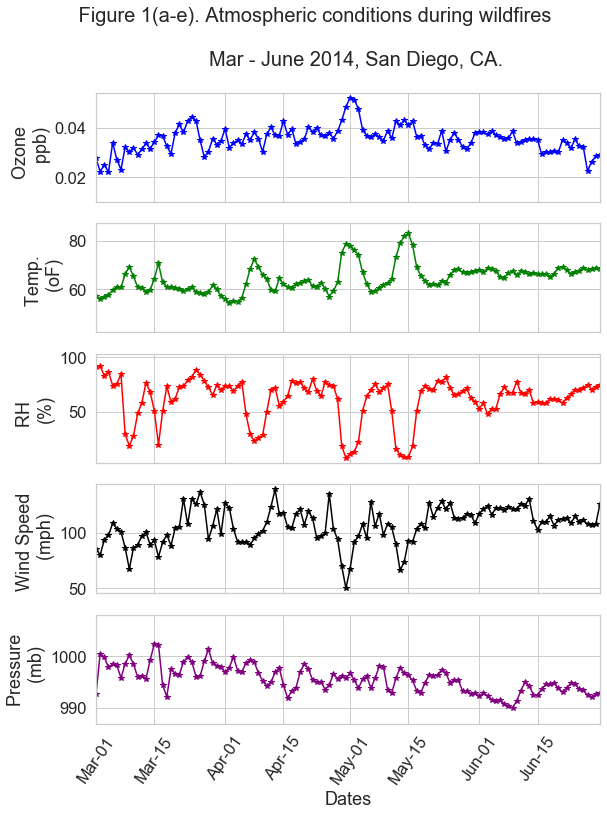

In [10]:
# Create plot space
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 
                            sharex = True, figsize = (10, 12))
# Add subtitle 
fig.subplots_adjust(bottom=0.15, left=0.2)
fig.suptitle(""" Figure 1(a-e). Atmospheric conditions during wildfires\n
                Mar - June 2014, San Diego, CA.""", fontsize = 20)

# Select plot type and add x and y-axis values to the plot.
ax1.plot(sd_mean_O3.index.values,
       sd_mean_O3['Arithmetic Mean'], 
       color = "blue",
       marker = "*")
ax2.plot(sd_mean_temp.index.values,
       sd_mean_temp['Arithmetic Mean'], 
       color = "green",
       marker = "*")
ax3.plot(sd_mean_RH.index.values,
       sd_mean_RH['Arithmetic Mean'], 
       color = "red",
       marker = "*")
ax4.plot(sd_mean_wind.index.values,
       sd_mean_wind['Arithmetic Mean'], 
       color = "black",
       marker = "*")
ax5.plot(sd_mean_pres.index.values,
       sd_mean_pres['Arithmetic Mean'], 
       color = "purple",
       marker = "*")

# Set plot title, axis labels and legends
ax1.set( 
       ylabel="Ozone  \n ppb)")
# ax4.set(title=
#             "(1d). Daily Mean temp, San Diego, CA. 2014")
ax2.set(
       ylabel="Temp. \n (oF)")
# ax5.set(title=
#             "(1e). Daily Mean temp, San Diego, CA. 2014")
ax3.set(#xlabel="Dates", 
       ylabel="RH  \n(%)")
#         xlim=["2014-03-01", "2014-07-01"])
ax4.set(#xlabel="Dates", 
       ylabel="Wind Speed \n (mph)")
# ax4.set(#title=
#             "(1d). Daily Mean wind speed (mph)")
ax5.set(xlabel="Dates", 
       ylabel=" Pressure \n  (mb)",
       xlim=["2014-03-01", "2014-06-30"])
# ax.set_ylabel('Damped oscillation [V]', labelpad=18)

# Add tick marks and rotate x-axis values
# plt.setp(ax1.get_xticklabels(), rotation=55)
plt.setp(ax5.get_xticklabels(), rotation=55)
# Define the date format
date_form1 = DateFormatter("%b-%d")
ax5.xaxis.set_major_formatter(date_form1)


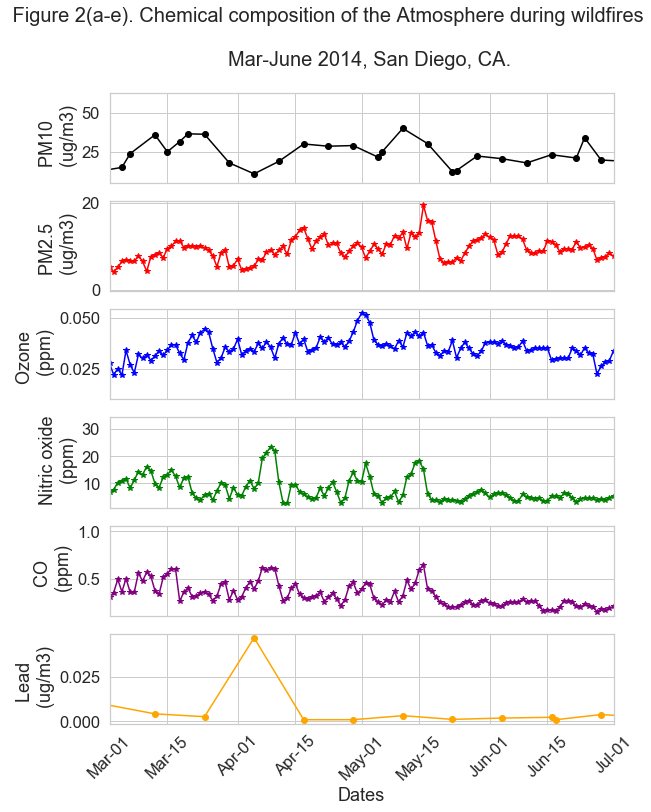

In [11]:
# Create plot space
fig, (ax1, ax2, ax3,ax4, ax5, ax6) = plt.subplots(6,1, sharex = True, figsize = (10, 12))

# Add subtitle 
fig.subplots_adjust(bottom=0.15, left=0.2)
fig.suptitle(""" Figure 2(a-e). Chemical composition of the Atmosphere during Wildfires\n
                Mar-June 2014, San Diego, CA.""", fontsize = 20)

# Select plot type and add x and y-axis values to the plot
ax1.plot(sd_mean_PM10.index.values,
       sd_mean_PM10['Arithmetic Mean'], 
       color = "black",
       marker = "o")
ax2.plot(sd_mean_aqi.index.values,
       sd_mean_aqi['Arithmetic Mean'], 
       color = "red",
       marker = "*")
ax3.plot(sd_mean_O3.index.values,
       sd_mean_O3['Arithmetic Mean'], 
       color = "blue",
       marker = "*")
ax4.plot(sd_mean_NO2.index.values,
       sd_mean_NO2['Arithmetic Mean'], 
       color = "green",
       marker = "*")
ax5.plot(sd_mean_CO.index.values,
       sd_mean_CO['Arithmetic Mean'], 
       color = "purple",
       marker = "*")

ax6.plot(sd_mean_lead.index.values,
       sd_mean_lead['Arithmetic Mean'], 
       color = "orange",
       marker = "o")

# Set plot title, axis labels and legends
# ax1.set(title=
#             "(2a). Daily Mean PM10, San Diego, CA. 2014")
ax1.set(#xlabel="Dates", 
       ylabel="PM10  \n (ug/m3)",
        xlim=["2014-03-01", "2014-07-01"])
# ax2.set(title=
#             "(2b). Daily PM2.5, San Diego, CA. 2014")
ax2.set(#xlabel="Dates", 
       ylabel="PM2.5 \n (ug/m3)",
        xlim=["2014-03-01", "2014-07-01"])
# ax3.set(title=
#             "(2c). Daily Mean O3, San Diego, CA. 2014")
ax3.set(#xlabel="Dates", 
       ylabel="Ozone \n (ppm)",
        xlim=["2014-03-01", "2014-07-01"])
ax4.set(#xlabel="Dates", 
       ylabel=" Nitric oxide\n (ppm)",
        xlim=["2014-03-01", "2014-07-01"])
ax5.set(#xlabel="Dates", 
       ylabel="CO \n (ppm)",
        xlim=["2014-03-01", "2014-07-01"])
ax6.set(xlabel="Dates", 
       ylabel="Lead \n (ug/m3)",
        xlim=["2014-03-01", "2014-07-01"])

# Add tick marks and rotate x-axis values
plt.setp(ax6.get_xticklabels(), rotation=45)
# Define the date format
date_form1 = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form1)
ax2.xaxis.set_major_formatter(date_form1)
ax3.xaxis.set_major_formatter(date_form1)
ax4.xaxis.set_major_formatter(date_form1)
ax5.xaxis.set_major_formatter(date_form1)
ax6.xaxis.set_major_formatter(date_form1)
# fig.tight_layout()

# Results and Conclusions
The May 2014 San Diego County wildfires were a swarm of ~ 20 wildfires that erupted on May 14, 2014, in San Diego County, California. I have analyzed all atmospheric pollutants for the entire county of San Diego. My results indicates that bone dry atmospheric conditions during "severe Santa Ana" characterized by high temperature, low relative humidity,triggered series of wildfires. Moreover, a historic drought in California (2010-2018), provided perfect fuel in the form of dried  bushes, vegetation and many dead trees.
1. Figure 1a-e clearly indicates that high temperature, low relative humidity and low pressure in the Southern California was prevalent from Apr. June. These conditions are called "Santa Ana" events which are responsible for brining hot dry air from the Great Plains of the USA towards coastal areas.
2. The extreme dry weather is the main culprit to ignite wild fires in the County of San Diego.
3. Figure 2a-e indicates that as a result of wildfires, particulate matter (PM10 and PM2.5) concentration increased in the air as shown by a peak value on May 15, 2014.
4. During wildfires the pollutants concentrations such as oxides of nitrogen, carbon monoxide and ozone concentrations has been increased to dangerous levels (doubles/ tripled than the Maximum Permissible limit by the EPA.
5. We breathe ~ 3000L of air every day and such high levels of pollutants in the air often trigger respiratory and cardiovascular diseases. Children and elderly people, sensitive populations often experience respiratory distress/asthma during such pollution events.
6. There is a mystery peak of ozone (O3), nitirc oxide (NO2) and lead in early April which require further exploratory studies.

# Future Outlook
The wildfire season of 2014 was devastating at multiple levels as it burned many residential areas in the county of San Diego, totally destroying 50 buildings. The 2014 wildfires had a profound effect on me as my friend's house was burned to ashes and she lost all exciting memories with her parents, family members and friends. I would like to conduct risk analysis using satellited data to identify potential fire fuel and devise precautionary measures to reduce the risk. 
My ultimate goal is to identify Santa Ana patterns using decades of data using advanced machine learning tools to develop forecast tools. This will allow us mitigate disaster and minimize damages.


## Santa Ana and Wildfires May 2014, San Diego, CA (source= wikimedia)

<a href="https://en.wikipedia.org/wiki/May_2014_San_Diego_County_wildfires" target="_blank">May 2014 Wildfires</a>.

**Figure 3. Landsat08 satellite image with maps of 2014 wildfires in the county of San Diego, CA, USA**
![Landsat Image of 2014 San Diego Fires](https://earthsky.org/upl/2014/05/Fox-5-San-Diego-Fire.jpg)

**Figure 4. Tomahawk Fire May 15, May16, 2014 picture of wildfire near Camp Pandleton, San Diego, CA. USA.**


<img style="float: left;" src="Tomahawk_Battling_the_Blaze_(14196295702).jpg" width="480" height="500" />
<img style="float: middle;" src="Tomahawk_fires_2014SD.jpg" width="400" height="300" />